# Data Visualization

A picture is woth a thousand words. Data visualization can help us uncover relationships and patterns that are hidden in our data.

First, we will use graphs to answer some car-related question: Do cars with big engines use more fuel than cars with small engines? What does the relationship between engine size and fuel efficiency look like? Is it positive? Negative? Linear? Nonlinear?

In [1]:
import pandas as pd

In [2]:
mpg = pd.read_csv('../data/mpg.csv', header=0)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [ ]:
mpg.shape

This dataframe contains 234 rows and 11 variables: 
* **manufacturer**
* **model**: model name
* **displ**: engine displacement, in litres
* **year**: year of manufacture
* **cyl**: number of cylinders
* **trans**: type of transmission
* **drv**: f = front-wheel drive, r = rear wheel drive, 4 = 4wd
* **cty**: city miles per gallon
* **hwy**: highway miles per gallon
* **fl**: fuel type
* **class**: "type" of car

In [3]:
# basic shape, data type, null values
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [4]:
mpg.describe()

,displ,year,cyl,cty,hwy
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,3.471795,2003.500000,5.888889,16.858974,23.440171
std,1.291959,4.509646,1.611534,4.255946,5.954643
min,1.600000,1999.000000,4.000000,9.000000,12.000000
25%,2.400000,1999.000000,4.000000,14.000000,18.000000
50%,3.300000,2003.500000,6.000000,17.000000,24.000000
75%,4.600000,2008.000000,8.000000,19.000000,27.000000
max,7.000000,2008.000000,8.000000,35.000000,44.000000


In [5]:
mpg.describe(include='all')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
count,234,234,234.000000,234.000000,234.000000,234,234,234.000000,234.000000,234,234
unique,15,38,NaN,NaN,NaN,10,3,NaN,NaN,5,7
top,dodge,caravan 2wd,NaN,NaN,NaN,auto(l4),f,NaN,NaN,r,suv
freq,37,11,NaN,NaN,NaN,83,106,NaN,NaN,168,62
mean,NaN,NaN,3.471795,2003.500000,5.888889,NaN,NaN,16.858974,23.440171,NaN,NaN
std,NaN,NaN,1.291959,4.509646,1.611534,NaN,NaN,4.255946,5.954643,NaN,NaN
min,NaN,NaN,1.600000,1999.000000,4.000000,NaN,NaN,9.000000,12.000000,NaN,NaN
25%,NaN,NaN,2.400000,1999.000000,4.000000,NaN,NaN,14.000000,18.000000,NaN,NaN
50%,NaN,NaN,3.300000,2003.500000,6.000000,NaN,NaN,17.000000,24.000000,NaN,NaN
75%,NaN,NaN,4.600000,2008.000000,8.000000,NaN,NaN,19.000000,27.000000,NaN,NaN


In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-v0_8') 

OSError: 'seaborn-v0_8' not found in the style library and input is not a valid URL or path; see `style.available` for list of available styles

## Creating a Plot 

In the mpg dataset, the two main variables of interest are engine size (displ) and fuel efficiency (hwy). They are both continuous variables. We can use a scatterplot to show their relationship. 

Scatter plot is often used for correlation analysis between different features. Correlation coefficient is between -1 and 1, representing negative and positive correlations. 0 means there is no liner correlation. Correlation is said to be linear if the ratio of change is constant, otherwise is non-linear.

Text(0, 0.5, 'hwy')

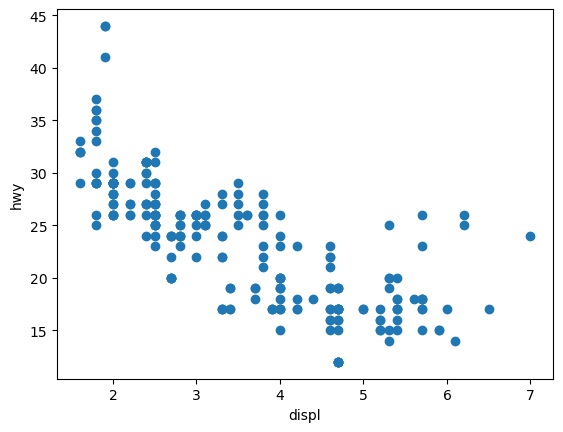

In [7]:
plt.scatter(x='displ',
            y='hwy',
            data=mpg)
plt.xlabel('displ')
plt.ylabel('hwy')

<AxesSubplot:xlabel='displ', ylabel='hwy'>

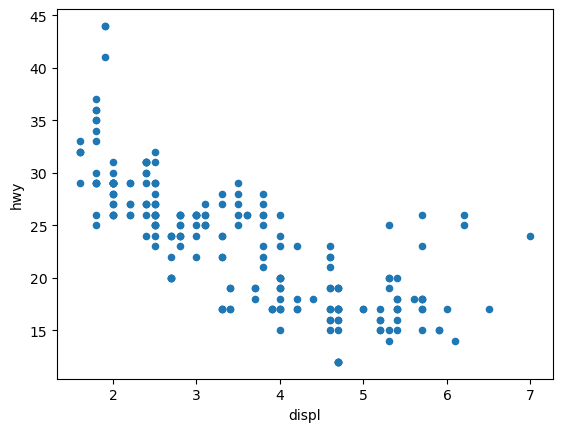

In [8]:
# A pandas dataframe can reference the matplotlib API
mpg.plot.scatter(x='displ', y='hwy')

<AxesSubplot:xlabel='displ', ylabel='hwy'>

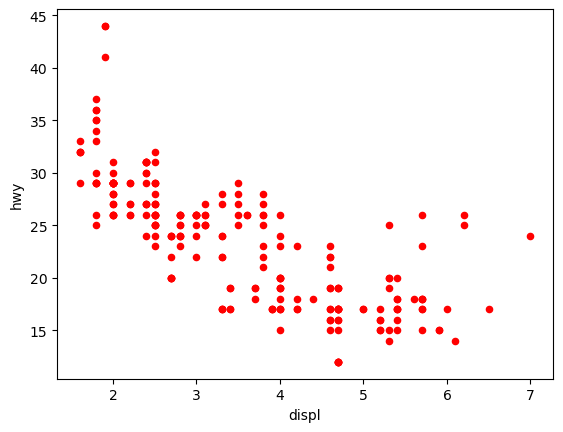

In [9]:
# Change the color
mpg.plot.scatter(x='displ', y='hwy', c='red')

## Adding more variables

In the *mpg* dataset, there are other variables. How do some of these variables affect the relationship between engine size (displ) and fuel efficiency (hwy)? 

For instance, we can add a third variable, like *class*, to a two dimensional scatterplot to indicate a certain property of objects by **color**, **size**, or **shape** of points. 

This is doable in **maplotlib** but a package named **"seaborn"** does this much more easily. 

In [11]:
import seaborn as sns

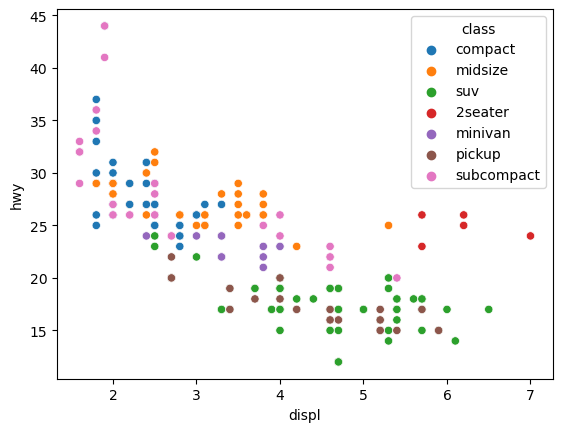

In [12]:
g = sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')

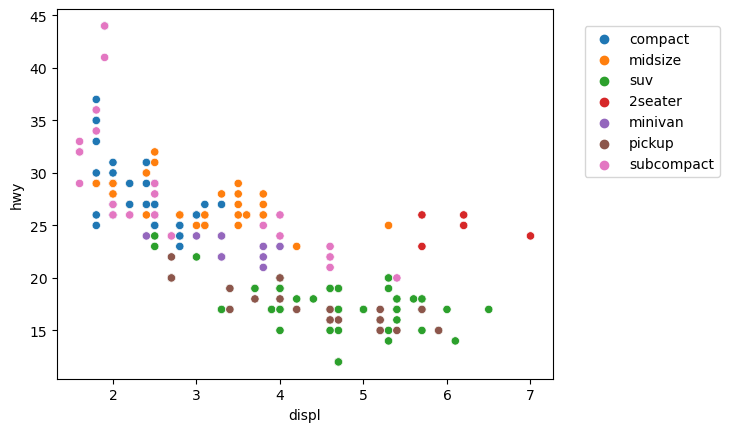

In [13]:
g = sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')
g.legend(loc='right', bbox_to_anchor=(1.35, 0.75), ncol=1)

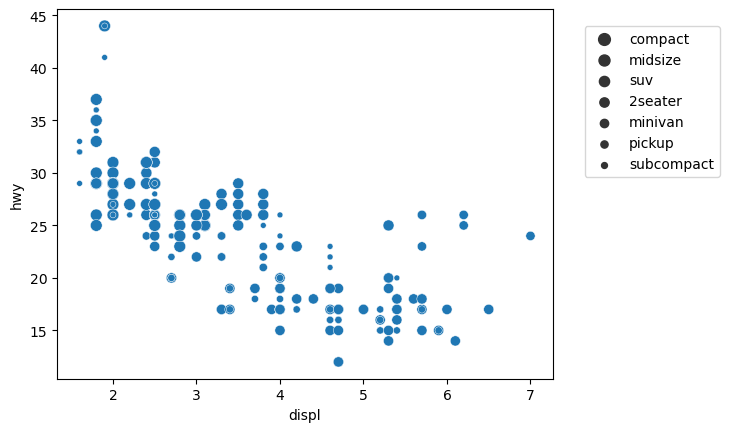

In [14]:
# Use size to represent different classes of cars. 
g = sns.scatterplot(data=mpg, x='displ', y='hwy', size='class')
g.legend(loc='right', bbox_to_anchor=(1.35, 0.75), ncol=1)

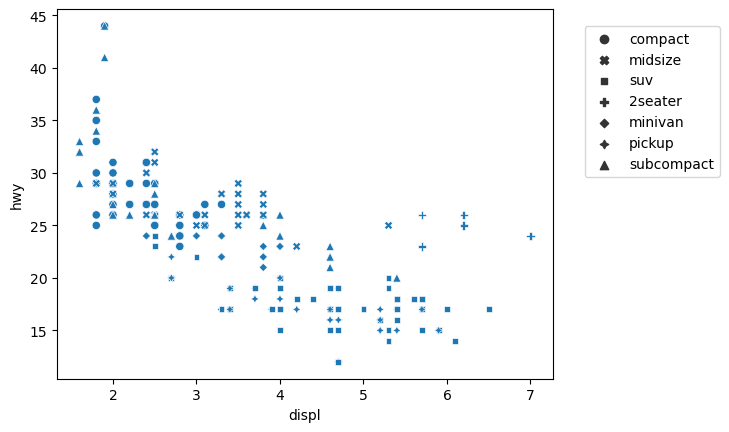

In [15]:
# Use style to represent different classes of cars. 
g = sns.scatterplot(data=mpg, x='displ', y='hwy', style='class')
g.legend(loc='right', bbox_to_anchor=(1.35, 0.75), ncol=1)

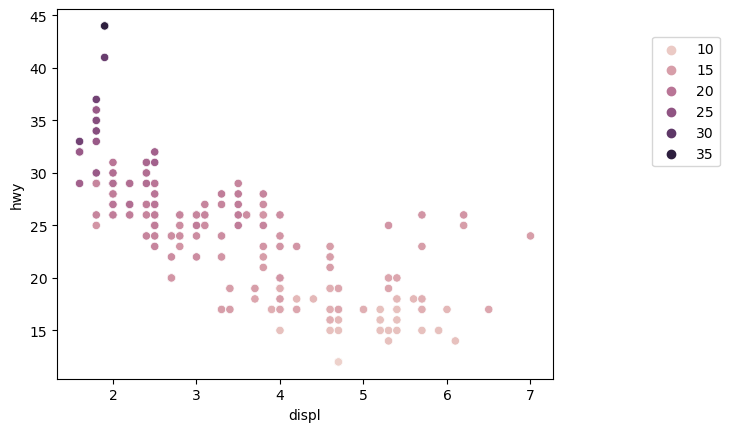

In [16]:
# Map a continuous variable to color or size. 

g = sns.scatterplot(data=mpg, x='displ', y='hwy', hue='cty')
g.legend(loc='right', bbox_to_anchor=(1.35, 0.75), ncol=1)

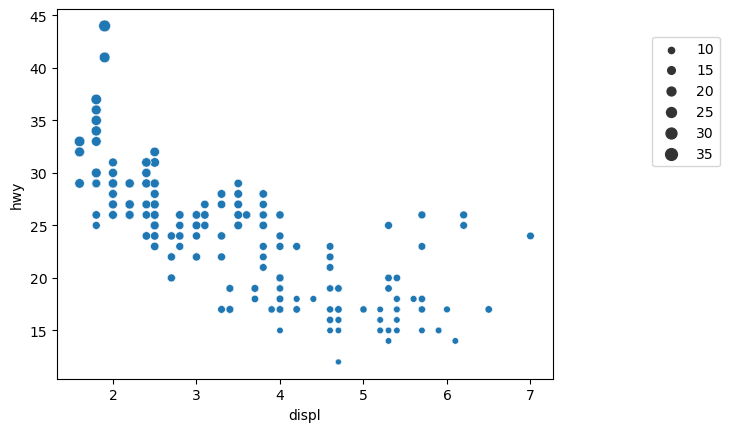

In [17]:
g = sns.scatterplot(data=mpg, x='displ', y='hwy', size='cty')
g.legend(loc='right', bbox_to_anchor=(1.35, 0.75), ncol=1)

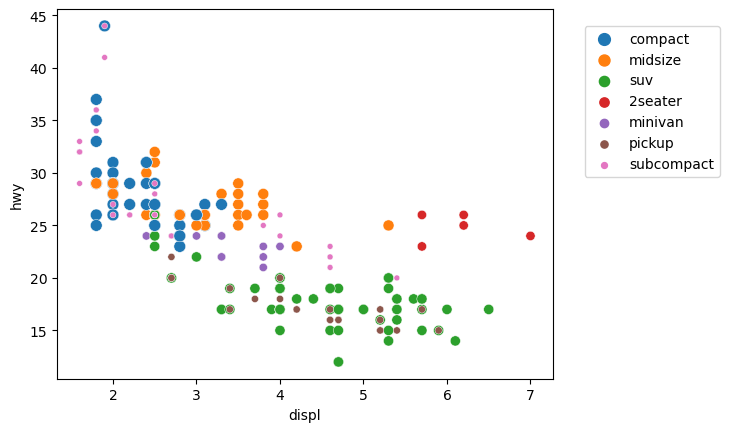

In [18]:
# What happens if you map the same variable to multiple aesthetics (e.g., color and size)?

g = sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class', size='class')
g.legend(loc='right', bbox_to_anchor=(1.35, 0.75), ncol=1)

# Different Chart Types

We can create different types of plots for data visualization. 

Can we create a line chart to show the relationship between **displ** and **hwy**? 

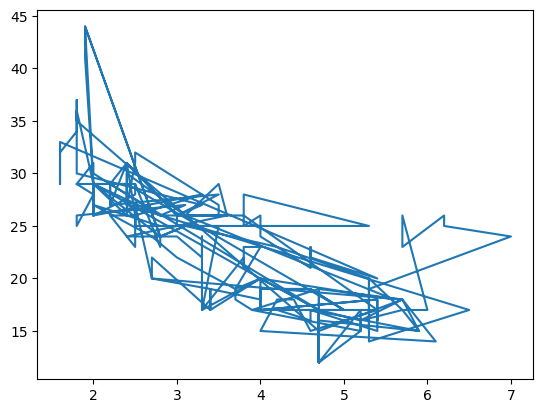

In [19]:
# Try this
plt.plot(mpg.displ, mpg.hwy)

In [ ]:
# Use this instead
sns.lineplot(data=mpg, x='displ', y='hwy')

In [ ]:
# Fit a trendline (linear with order=1)
sns.regplot(data=mpg, x='displ', y='hwy', order=1)

In [ ]:
# Fit a non-linear trendline with order=2)
sns.regplot(data=mpg, x='displ', y='hwy', order=2)

In [ ]:
# Add a new variable into the line chart as color
sns.lineplot(data=mpg, x='displ', y='hwy',hue='drv')

In [ ]:
# Add a new variable into the line chart as line style
sns.lineplot(data=mpg, x='displ', y='hwy',style='drv')

In [ ]:
# Overlay multiple plots in one chart
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')
sns.lineplot(data=mpg, x='displ', y='hwy')

In [ ]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='class')
sns.regplot(data=mpg, x='displ', y='hwy', order=2, scatter=False) # Hide the scatter points

<AxesSubplot:xlabel='displ', ylabel='hwy'>

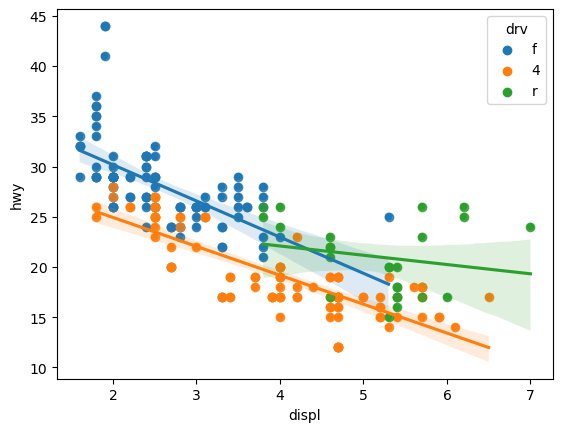

In [27]:
sns.scatterplot(data=mpg,x=mpg.displ,y=mpg.hwy,hue='drv')
sns.regplot(data=mpg[mpg.drv=='f'], x='displ', y='hwy')
sns.regplot(data=mpg[mpg.drv=='4'], x='displ', y='hwy')
sns.regplot(data=mpg[mpg.drv=='r'], x='displ', y='hwy')

## Statistical Transformation

### Bar charts

Bar charts seem simple, but they are interesting because they reveal something subtle about plots. 

The diamonds dataset contains information about ~54,000 diamonds, including the price, carat, color, clarity, and cut of each diamond. The chart shows that more diamonds are available with high quality cuts than with low quality cuts.

In [29]:
dmds = sns.load_dataset('diamonds')
dmds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [30]:
dmds.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


The following chart displays the total number of diamonds in the diamonds dataset, grouped by cut. 

<AxesSubplot:>

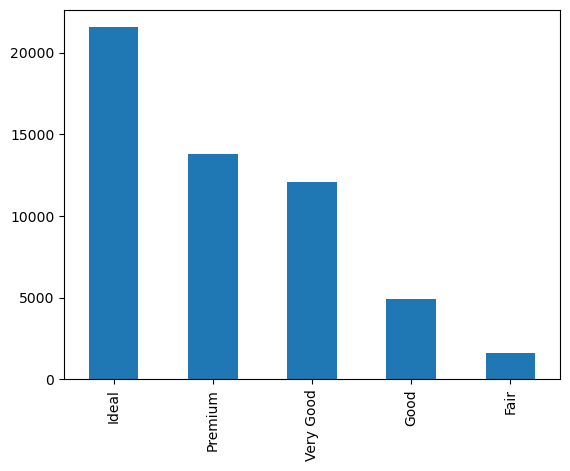

In [31]:
dmds.cut.value_counts(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='cut', ylabel='count'>

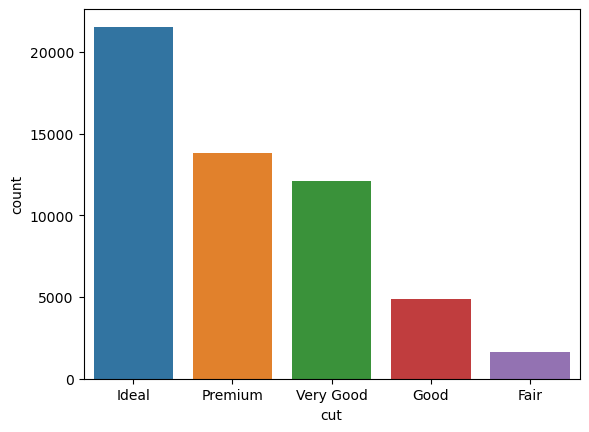

In [32]:
sns.countplot(data=dmds, x='cut')

On the x-axis, the chart displays cut, a variable from diamonds. On the y-axis, it displays count, but count is not a variable in diamonds! Where does count come from? 

Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values (i.e., **stats**) to plot. 

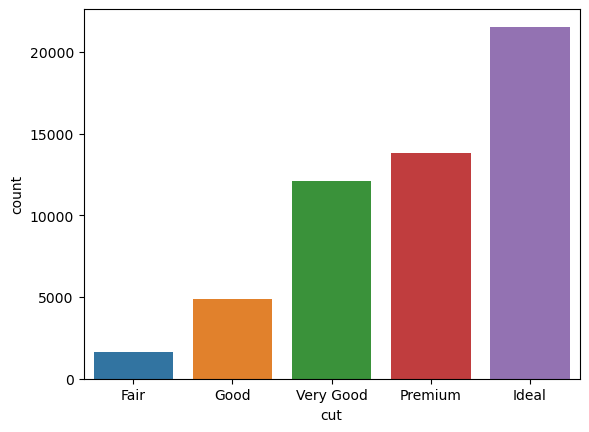

In [33]:
# Sort the values in ascending order
order = dmds['cut'].value_counts(ascending=True).index
sns.countplot(data=dmds, x='cut',order=order)
plt.show()

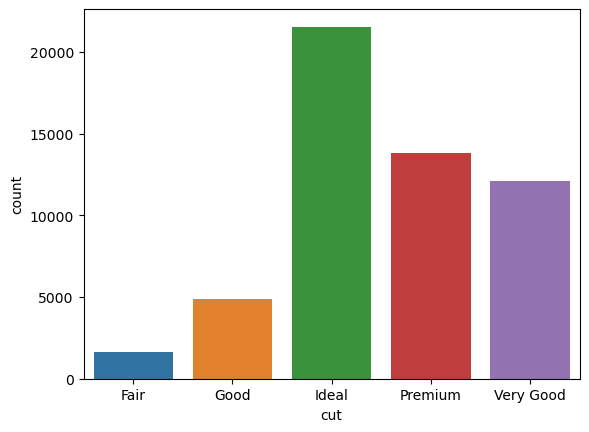

In [34]:
# Sort the values in alphabetical order of 'cut'
cut_list = dmds.cut.unique().tolist()
cut_sorted = sorted(cut_list)
sns.countplot(data=dmds, x='cut',order=cut_sorted)
plt.show()

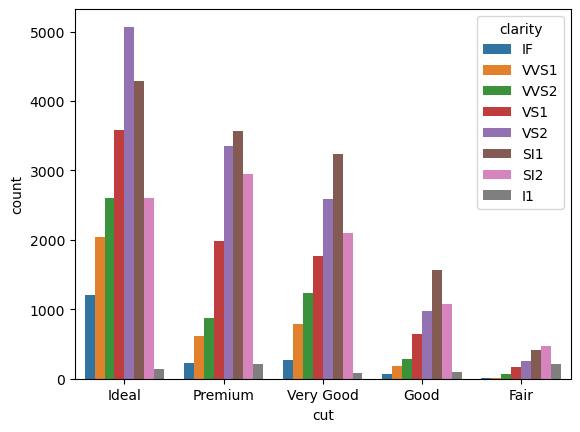

In [35]:
# Add a new variable into the bar chart as color
sns.countplot(data=dmds, x='cut', hue='clarity')
plt.show()

In [ ]:
# You can also flip the chart by putting 'clarity' on y axis. 
sns.countplot(data=dmds, y='cut', hue='clarity')

### Histograms

Similarly, we can use histograms to check the followings:

- The distributions of the data
- center and spread of the data
- skewness of the data
- presence of outliers

In [ ]:
sns.histplot(data=dmds, x='cut')
plt.show()

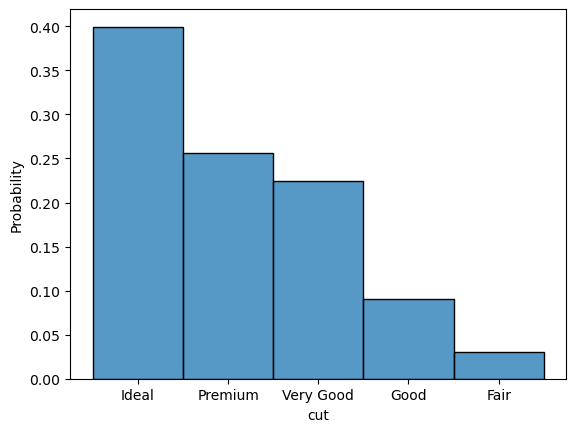

In [36]:
# In histplot(), you can choose to show the probability rather than count. 
sns.histplot(data=dmds, x='cut', stat='probability')
plt.show()

<AxesSubplot:xlabel='cut', ylabel='Probability'>

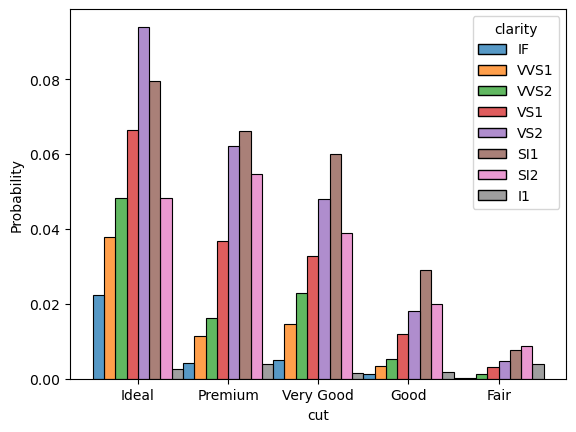

In [37]:
# Add another variable to histplot
sns.histplot(data=dmds, x='cut', hue='clarity', stat='probability', multiple='dodge')

In [1]:
# Stack the bars 
sns.histplot(data=dmds, x='cut', hue='clarity',multiple='stack')

NameError: name 'sns' is not defined

### Histograms for continuous variables

In [ ]:
sns.histplot(data=dmds, x='price')

In [ ]:
sns.histplot(data=dmds, x='price', bins=50)

In [ ]:
sns.histplot(data=dmds, x='price', bins=20, hue='cut', multiple="stack")
plt.show()

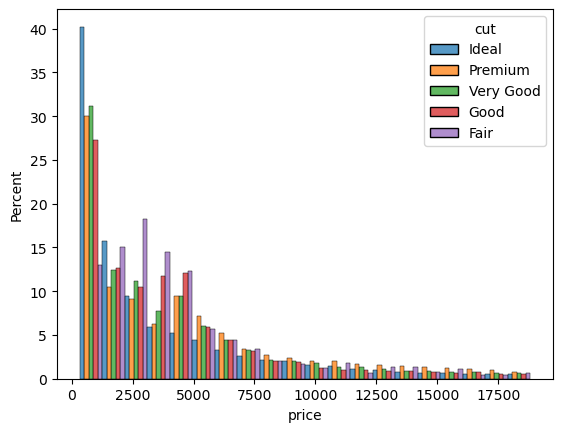

In [39]:
sns.histplot(data=dmds, x='price', bins=20, hue='cut', stat="percent", multiple="dodge", common_norm=False)
plt.show()

# Box plot

adapted from: https://en.wikipedia.org/wiki/Box_plot:

A boxplot displays the dataset based on a five-number summary:
- Median (Q2 / 50th Percentile) : the middle value of the dataset.
- First quartile (Q1 / 25th Percentile) : the middle value between the smallest number and the median of the dataset.
- Third quartile (Q3 / 75th Percentile) : the middle value between the largest number and the median of the dataset.
- Minimum (**NOT the smallest**): the lowest data point **excluding any outliers**.
- Maximum (**NOT the largest**): the largest data point **excluding any outliers**.
- Interquartile Range (IQR) is the distance between the upper and lower quartile: IQR=Q3-Q1

IQR is used to determine outliers, which are points that are either greater than Q3+1.5IQR or less than Q1-1.5IQR.

In [ ]:
dmds['price'].plot.box()

In [ ]:
sns.boxplot(data=dmds, y='price')

In [ ]:
sns.boxplot(data=dmds, x='cut', y='price')

In [ ]:
sns.boxplot(data=dmds, x='cut', y='depth')

### Plotting with categorical variables

In [ ]:
# We have created a scatterplot of two numerical variables. 
sns.scatterplot(data=mpg, x='displ', y='hwy')

In [ ]:
# Now, let's try creating a scatterplot of two categorical variables. 
sns.scatterplot(data=mpg, x='drv', y='class')

Why are there so few points? Overlapping. This does not show the "density" of data points.

Consider using a stripplot() when at least one variable is categorical. 

In [ ]:
sns.stripplot(data=mpg, x='drv', y='class')

In [ ]:
# You can use this for plotting a categorical and a numerical variable, too. 
sns.stripplot(data=mpg, x='class', y='hwy')

In [ ]:
# What happens if you map an aesthetic to something other than a variable name? 
# In the scatter plot, Differentiate datapoints (cars) with displ < 5 with a different color. 

# Create a new series with boolean values
displ5 = mpg['displ']<5
#displ5
g = sns.scatterplot(data=mpg, x='cyl', y='hwy', hue=displ5)


### Pie chart

Not so easy with basic functions. Need to perform some aggregation functions first. 

In [1]:
dmds.cut.value_counts().plot(kind='pie')

NameError: name 'dmds' is not defined

In [2]:
mpg['class'].value_counts().plot(kind='pie')

NameError: name 'mpg' is not defined